# Data Visualization And Training Models
## In this notebook the preprocessed data are visualized on charts and ML models are learned. Furthermore model with the best statistic measure (for example accuracy) is picked to save into file.

## 1. Install necessary libraries

In [1]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from feature_extraction.feature_extraction import FeatureExtraction
from feature_extraction.utils import PatternCollector
from utils.measure_time import measure_time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from utils.plot_two_cat import PlotTwoCat
from sklearn.ensemble import ExtraTreesClassifier
import keras
from keras.src.layers import Dense

## 2. Load preprocessed data from files

In [2]:
path_to_phish_data_file = os.path.join('preprocessed_data', 'phish_data.csv')
path_to_non_phish_data_longer = os.path.join('preprocessed_data', 'non_phish_data_longer.csv')
path_to_non_phish_data_shorter = os.path.join('preprocessed_data', 'non_phish_data_shorter.csv')

In [3]:
df1_phish = pd.read_csv(path_to_phish_data_file, index_col='Unnamed: 0', encoding='utf-8')
df1_phish.rename(columns={'PHISH_URL': 'URL'}, inplace=True)

In [4]:
df1_phish.head()

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1


In [5]:
df2_non_phish = pd.read_csv(path_to_non_phish_data_shorter, index_col='Unnamed: 0')
df2_non_phish.rename(columns={'NON_PHISH_URL': 'URL'}, inplace=True)

In [6]:
df2_non_phish.head()

,URL,label
0,https://releases.jquery.com/,0
1,https://code.jquery.com/,0
2,https://app.ether.fi/blocked,0
3,https://efty.com/d/2zfr2/NeonClaims.com/,0
4,https://www.yahoo.com/?&sid=74508,0


### 2.1 Check the data shape:

In [7]:
df1_phish.shape

(154832, 2)

In [8]:
df2_non_phish.shape

(443531, 2)

In [9]:
df_merged = pd.concat([df1_phish, df2_non_phish])
df_merged

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1
...,...,...
443567,https://imetrica.net/css/,0
443568,https://www.idxband.com/telin/images/e-online.php,0
443569,https://www.coffeewithsophieinc.com/media/syst...,0
443570,https://conseguircreditos.webs.tl/,0


### 2.2 Merge data:

In [10]:
df_merged.shape

(598363, 2)

### 2.3 Drop duplicates:

In [11]:
df_merged.nunique()

URL      598227
label         2
dtype: int64

In [12]:
df_merged[df_merged['URL'].duplicated()]

,URL,label
5654,https://solcold.com/,0
5655,http://solcold.com/,0
5656,https://darkhost.pro:443/,0
5740,https://ciet-itac.ca/fr/user/login,0
5751,http://sistema.gavadent.com/admin/site/login,0
...,...,...
418611,https://webmail.genotec.ch/atmail/compose.php?...,0
422034,https://jaixnchoncolimited.yolasite.com/,0
428467,https://www.fifaonlineligen.com/cms_core/RELAT...,0
428469,https://www.fifaonlineligen.com/cms_core/CTYPE...,0


In [13]:
df_merged['URL'].duplicated().sum()

136

In [14]:
df_merged.drop_duplicates(subset=['URL'], inplace=True, keep=False)

In [15]:
df_merged.nunique()

URL      598091
label         2
dtype: int64

### 2.4 Check new shape:

In [16]:
df_merged.shape

(598091, 2)

## 3. Take equal number of rows from both DataFrames (equal distribution of labels)

### 3.1 Sample rows with label equal 1:

In [17]:
label1_filter = df_merged['label'] == 1
df_urls_1 = df_merged[label1_filter].sample(50_000)

In [18]:
df_urls_1.shape

(50000, 2)

In [19]:
df_urls_1.groupby('label').count()

,URL
label,
1,50000


### 3.2 Sample rows with label equal 0:

In [20]:
label0_filter = df_merged['label'] == 0
df_urls_2 = df_merged[label0_filter].sample(50_000)

In [21]:
df_urls_2.shape

(50000, 2)

In [22]:
df_urls_2.groupby('label').count()

,URL
label,
0,50000


### 3.3 Merge DataFrames into one frame:

In [23]:
df_urls = pd.concat([df_urls_1, df_urls_2])

In [24]:
df_urls.shape

(100000, 2)

In [25]:
df_urls.groupby('label').count()

,URL
label,
0,50000
1,50000


In [26]:
df_urls.head()

,URL,label
46778,https://cf-ipfs.com/ipfs/QmW9TdwnE5Y4PcJm8hmiD...,1
62824,curiozo.com.br,1
152909,www.rpg.net/news+reviews/reviews/rev_1287.html,1
6748,https://jdb8.ktt55.my.id/,1
135281,xpdom.sourceforge.net/html/index_frame.html,1


In [27]:
df_urls.tail()

,URL,label
353742,https://answers.yahoo.com/question/index?qid=2...,0
270555,https://en.wikipedia.org/wiki/Lewis_Black%27s_...,0
218431,https://dorsey.com/,0
296836,https://classic-horror.com/newsreel/kevin_g_sh...,0
397782,https://vprimas.info/sess=62370/cgi-skm26qp5u9...,0


### 3.4 Shuffle probes in the set:

In [28]:
df_urls = df_urls.sample(len(df_urls))

In [29]:
df_urls.head(10)

,URL,label
112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1
14473,http://payday2concepts.jimdo.com/,0
7439,https://uspc.uspbo.top/pg/?do=index,1
107002,https://pointsdevue.net/home,0
129609,homepage.eircom.net/~deelakord/,1
56225,https://youtube.com/watch?v=chCnhe7huvo,0
98106,https://grindtimegym.com/wp-admin/includes/cla...,1
100037,http://toquedsol.com/img/scenes/thumbs/worldwi...,1
136130,www.webteacher.com/cgi/index.html,1
55130,https://jvt05f.webwave.dev/,1


In [30]:
df_urls.tail(10)

,URL,label
117553,www.mrc-bsu.cam.ac.uk/bugs/winbugs/contents.shtml,1
102809,https://forms.office.com/Pages/ResponsePage.as...,1
22324,https://docs.google.com/presentation/d/e/2PACX...,1
119442,https://southwestfrance.info/?-place-de-la-bou...,0
99248,https://storage.googleapis.com/bbsegcliente/,1
125123,tools.ietf.org/html/rfc32,1
89794,https://prnewswire.com/news-releases/sxsw-eco-...,0
49741,https://pnclog.web.app/,1
173394,https://allmusic.com/artist/miracle-fortress-p...,0
87060,fjkdledcsc.5gbfree.com,1


In [31]:
df_urls.shape

(100000, 2)

In [32]:
df_urls.groupby('label').count()

,URL
label,
0,50000
1,50000


### 3.5 Check for nulls:

In [33]:
df_urls['URL'].isnull().sum()

0

In [34]:
df_urls['URL'].isnull().sum()

0

### 3.6 Plot distribution of the data:

In [35]:
labels_counts = df_urls['label'].value_counts()
label_desc = labels_counts.index
labels_counts

label
1    50000
0    50000
Name: count, dtype: int64

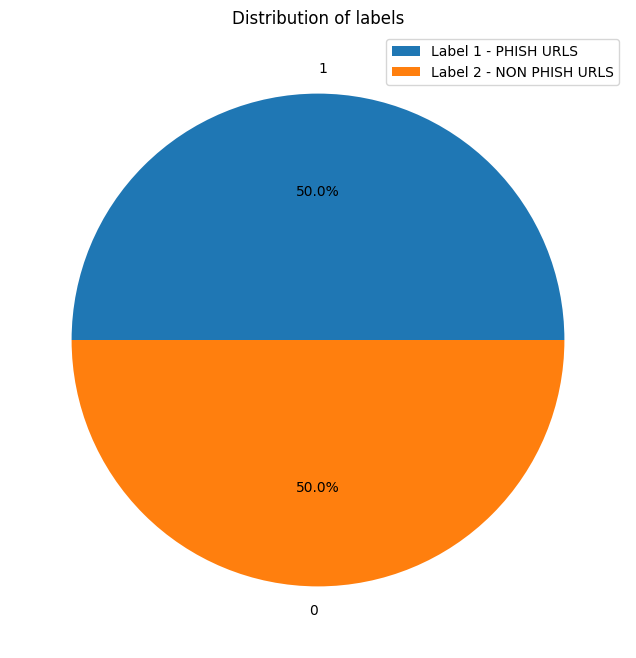

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=label_desc, autopct='%1.1f%%')
plt.title("Distribution of labels")
plt.legend(['Label 1 - PHISH URLS', 'Label 2 - NON PHISH URLS'], loc='upper right')
plt.show()

## 4. Save sampled urls to file

### 4.1 Save to file

In [37]:
df_urls.to_csv(os.path.join('sampled_data', 'sampled_data50to50.csv'), encoding='utf-8')

### 4.2 Save to file

In [38]:
df_urls = pd.read_csv(os.path.join('sampled_data', 'sampled_data50to50.csv'), encoding='utf-8')
df_urls

,Unnamed: 0,URL,label
0,112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1
1,14473,http://payday2concepts.jimdo.com/,0
2,7439,https://uspc.uspbo.top/pg/?do=index,1
3,107002,https://pointsdevue.net/home,0
4,129609,homepage.eircom.net/~deelakord/,1
...,...,...,...
99995,125123,tools.ietf.org/html/rfc32,1
99996,89794,https://prnewswire.com/news-releases/sxsw-eco-...,0
99997,49741,https://pnclog.web.app/,1
99998,173394,https://allmusic.com/artist/miracle-fortress-p...,0


In [39]:
df_urls.rename(columns={'Unnamed: 0': 'OLD_INDEX'}, inplace=True)
df_urls

,OLD_INDEX,URL,label
0,112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1
1,14473,http://payday2concepts.jimdo.com/,0
2,7439,https://uspc.uspbo.top/pg/?do=index,1
3,107002,https://pointsdevue.net/home,0
4,129609,homepage.eircom.net/~deelakord/,1
...,...,...,...
99995,125123,tools.ietf.org/html/rfc32,1
99996,89794,https://prnewswire.com/news-releases/sxsw-eco-...,0
99997,49741,https://pnclog.web.app/,1
99998,173394,https://allmusic.com/artist/miracle-fortress-p...,0


## 5. Extract features with previously created methods and add them to DataFrame

### 5.1 Get length of url:

In [40]:
df_urls['URL_LENGTH'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).url_length)

In [41]:
df_urls.head()

,OLD_INDEX,URL,label,URL_LENGTH
0,112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1,46
1,14473,http://payday2concepts.jimdo.com/,0,33
2,7439,https://uspc.uspbo.top/pg/?do=index,1,35
3,107002,https://pointsdevue.net/home,0,28
4,129609,homepage.eircom.net/~deelakord/,1,31


In [42]:
grouped_by_length = df_urls[['URL_LENGTH', 'URL']].groupby(['URL_LENGTH']).count()
grouped_by_length

,URL
URL_LENGTH,
1,1
2,1
4,1
5,3
6,3
...,...
2081,1
2165,1
2167,1


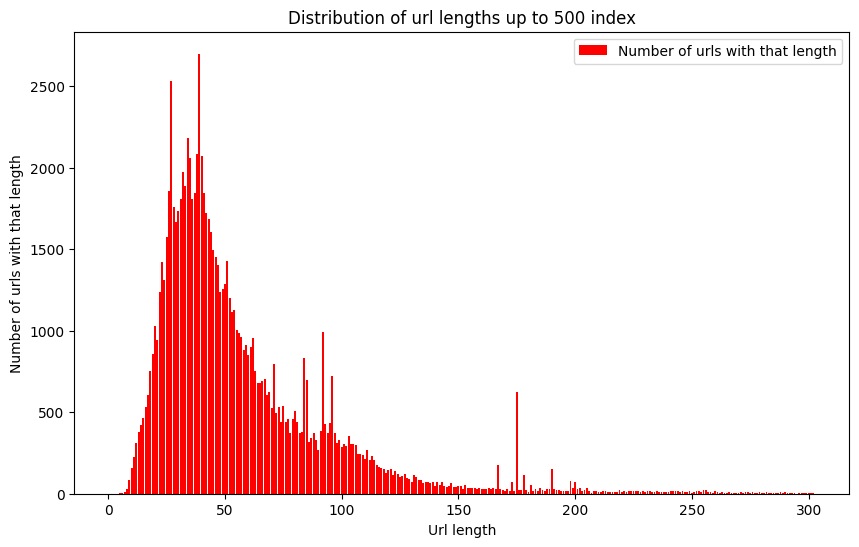

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_length.index[:300], grouped_by_length['URL'][:300], color='red')
plt.title("Distribution of url lengths up to 500 index")
plt.xlabel("Url length")
plt.ylabel("Number of urls with that length")
plt.legend(['Number of urls with that length'], loc='upper right')
plt.show()

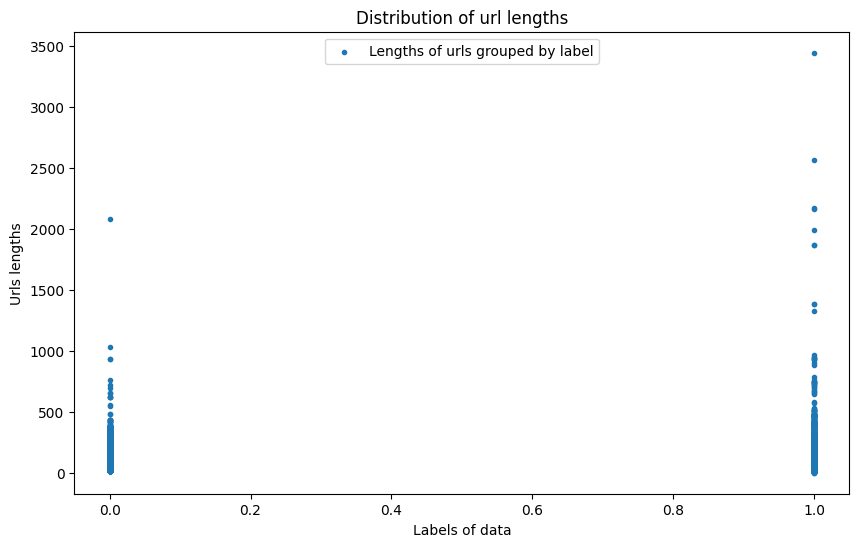

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['URL_LENGTH'], marker='.')
plt.title("Distribution of url lengths")
plt.xlabel("Labels of data")
plt.ylabel("Urls lengths")
plt.legend(['Lengths of urls grouped by label'], loc='upper center')
plt.show()

### 5.2 Check if URL has @ sign:

In [45]:
df_urls['HAVE_@'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_at_sign() else 0)

In [46]:
legitimate_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 0)
phish_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_at_filter]), len(df_urls[legitimate_and_not_have_at_filter])]
values2 = [len(df_urls[phish_and_have_at_filter]), len(df_urls[phish_and_not_have_at_filter])]

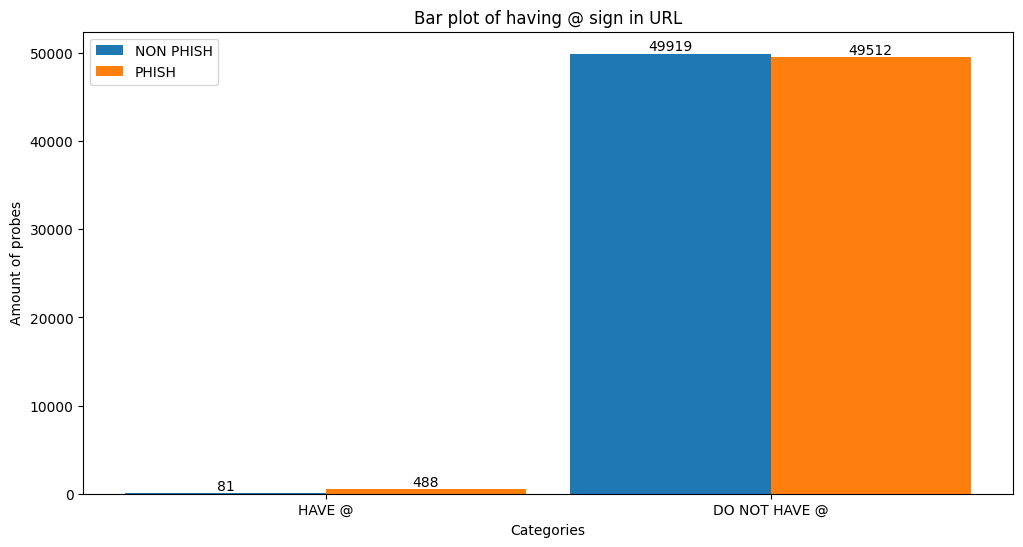

In [47]:
PlotTwoCat(
    positive_cat='HAVE @',
    negative_cat='DO NOT HAVE @',
    title='Bar plot of having @ sign in URL',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()

### 5.3 Check if URL has IP address instead of domain name:

In [48]:
df_urls['HAVE_IP'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_ip_address() else 0)

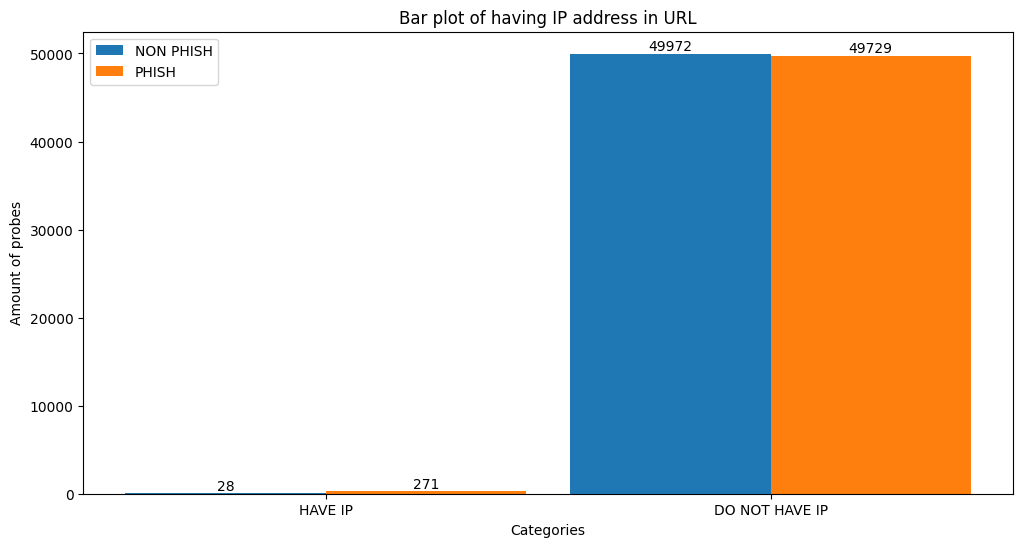

In [49]:
# Filter results
legitimate_and_have_ip_filter = (df_urls['HAVE_IP'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_ip_filter = (df_urls['HAVE_IP'] == 0) & (df_urls['label'] == 0)
phish_and_have_ip_filter = (df_urls['HAVE_IP'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_ip_filter = (df_urls['HAVE_IP'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_ip_filter]), len(df_urls[legitimate_and_not_have_ip_filter])]
values2 = [len(df_urls[phish_and_have_ip_filter]), len(df_urls[phish_and_not_have_ip_filter])]

PlotTwoCat(
    positive_cat='HAVE IP',
    negative_cat='DO NOT HAVE IP',
    title='Bar plot of having IP address in URL',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


### 5.4 Check if URL is shorter than mean length in set:

In [50]:
mean_url_length = (df_urls['URL'].apply(lambda url: len(url)).sum()/len(df_urls['URL'])).__floor__()
print(f"Mean URL length: {mean_url_length} chars")

Mean URL length: 58 chars


In [51]:
df_urls['LONGER_THAN_MEAN'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).url_longer_than(mean_url_length) else 0)

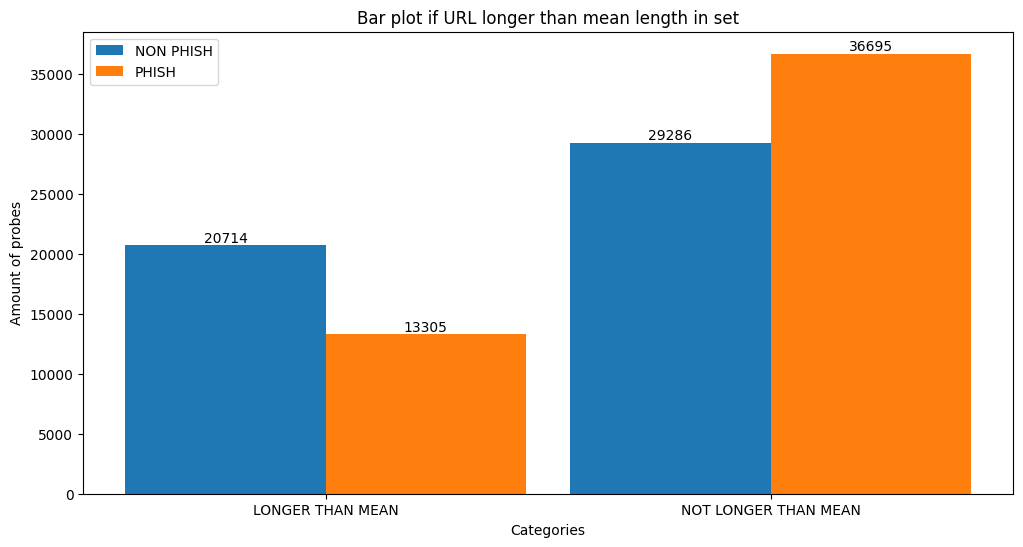

In [52]:
# Filter results
legitimate_and_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 0) & (df_urls['label'] == 0)
phish_and_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 1) & (df_urls['label'] == 1)
phish_and_not_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_longer_than_mean_filter]), len(df_urls[legitimate_and_not_longer_than_mean_filter])]
values2 = [len(df_urls[phish_and_longer_than_mean_filter]), len(df_urls[phish_and_not_longer_than_mean_filter])]

PlotTwoCat(
    positive_cat='LONGER THAN MEAN',
    negative_cat='NOT LONGER THAN MEAN',
    title='Bar plot if URL longer than mean length in set',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


### 5.5 Collect chars from URL:

In [53]:
@measure_time
def collect_chars() -> pd.DataFrame:
    chars_df = pd.DataFrame()
    for c in PatternCollector.chars:
        chars_df[c] = pd.DataFrame.from_dict(df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_characters().get(c)))
    return chars_df

In [54]:
df = collect_chars()

Measured running time of collect_chars: 0:00:44.901313


In [55]:
print(df.shape)
df.head()

(100000, 32)


,!,@,#,$,%,^,&,*,(,),...,<,>,?,/,+,=,-,_,',""""
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [56]:
df_urls = pd.merge(df_urls, df, left_index=True, right_index=True, how='inner')
print(df_urls.shape)
df_urls.head()

(100000, 39)


,OLD_INDEX,URL,label,URL_LENGTH,HAVE_@,HAVE_IP,LONGER_THAN_MEAN,!,@,#,...,<,>,?,/,+,=,-,_,',""""
0,112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1,46,0,0,0,0,0,0,...,0,0,1,2,0,1,0,1,0,0
1,14473,http://payday2concepts.jimdo.com/,0,33,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2,7439,https://uspc.uspbo.top/pg/?do=index,1,35,0,0,0,0,0,0,...,0,0,1,4,0,1,0,0,0,0
3,107002,https://pointsdevue.net/home,0,28,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,129609,homepage.eircom.net/~deelakord/,1,31,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


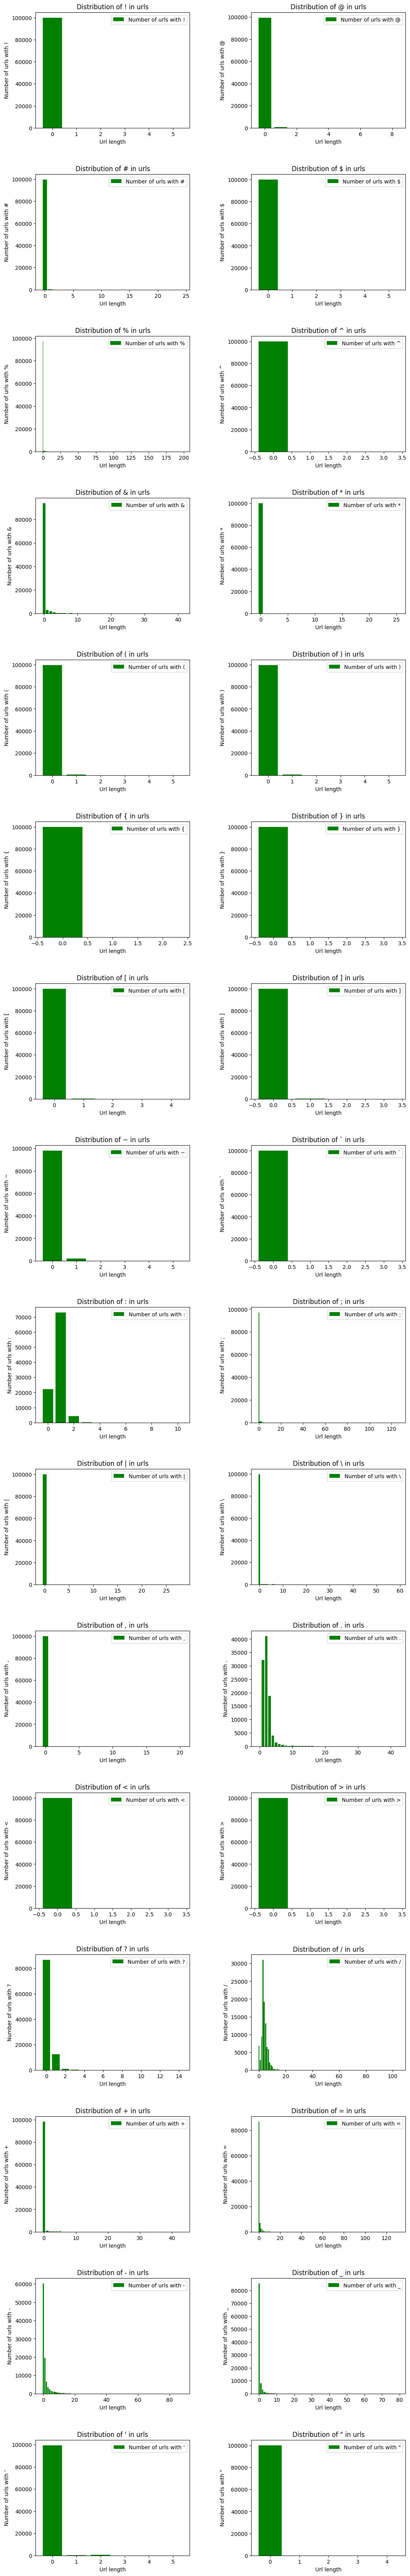

In [57]:
plt.figure(figsize=(12, 60))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
for pos, char in enumerate(PatternCollector.chars):    
    grouped_by_char = df_urls[[char, 'URL']].groupby([char]).count()
    plt.subplot(16, 2, pos+1)
    plt.bar(grouped_by_char.index, grouped_by_char['URL'], color='green', )
    plt.title(f"Distribution of {char} in urls")
    plt.xlabel("Url length")
    plt.ylabel(f"Number of urls with {char}")
    plt.legend([f'Number of urls with {char}'], loc='upper right')

plt.show()

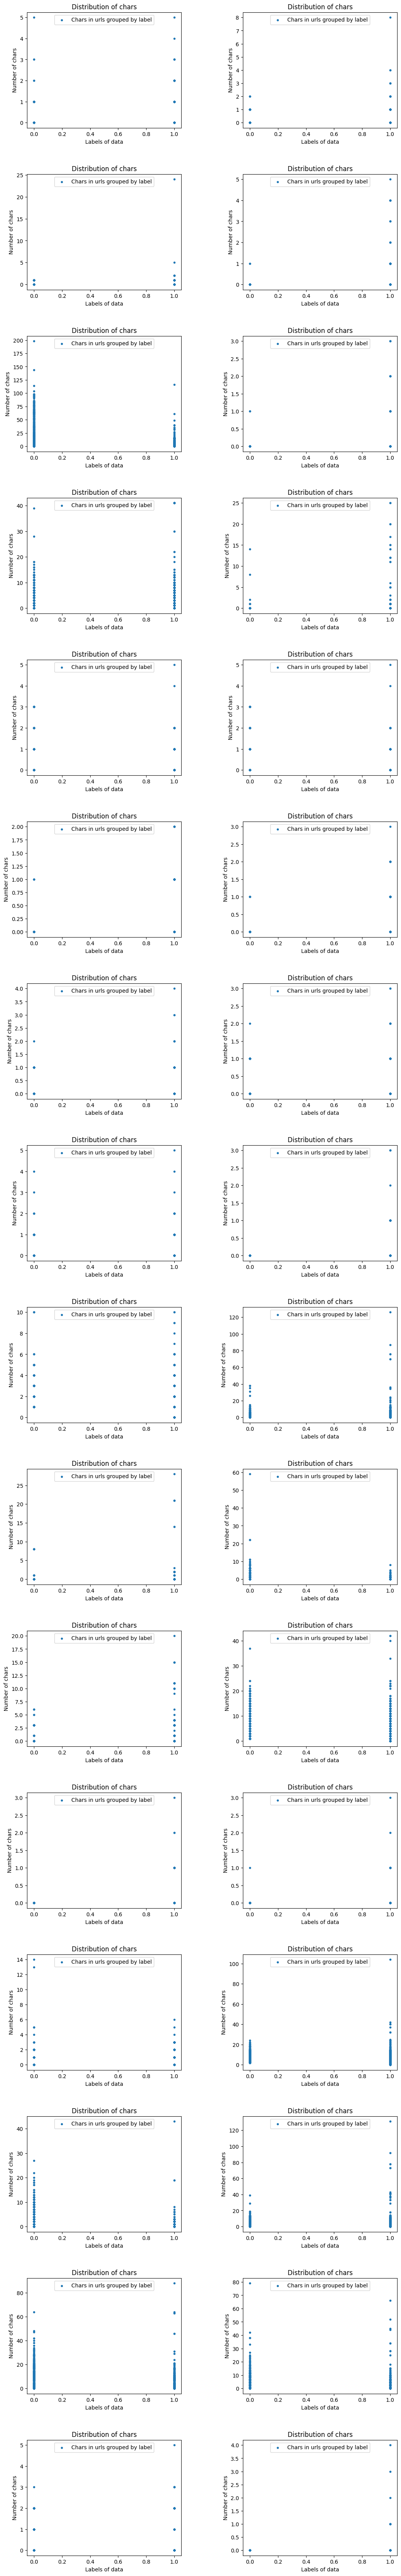

In [58]:
plt.figure(figsize=(12, 60))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
for pos, char in enumerate(PatternCollector.chars):    
    grouped_by_char = df_urls[[char, 'URL']].groupby([char]).count()
    plt.subplot(16, 2, pos+1)
    plt.scatter(df_urls['label'], df_urls[char], marker='.')
    plt.title("Distribution of chars")
    plt.xlabel("Labels of data")
    plt.ylabel("Number of chars")
    plt.legend(['Chars in urls grouped by label'], loc='upper center')

plt.show()

In [59]:
# Count chars and drop that columns in which there are zero chars in any url
for ch in PatternCollector.chars:
    print(f"Number of urls with an once '{ch}': {df_urls[df_urls[ch] != 0][ch].count()}")
    zero_chars_in_set = df_urls[df_urls[ch] != 0][ch].count() == 0
    if zero_chars_in_set:
        df_urls = df_urls.drop(ch, axis=1)


Number of urls with an once '!': 75
Number of urls with an once '@': 569
Number of urls with an once '#': 387
Number of urls with an once '$': 33
Number of urls with an once '%': 2882
Number of urls with an once '^': 18
Number of urls with an once '&': 6246
Number of urls with an once '*': 46
Number of urls with an once '(': 474
Number of urls with an once ')': 473
Number of urls with an once '{': 54
Number of urls with an once '}': 55
Number of urls with an once '[': 176
Number of urls with an once ']': 175
Number of urls with an once '~': 1972
Number of urls with an once '`': 16
Number of urls with an once ':': 77758
Number of urls with an once ';': 2909
Number of urls with an once '|': 31
Number of urls with an once '\': 435
Number of urls with an once ',': 147
Number of urls with an once '.': 99977
Number of urls with an once '<': 14
Number of urls with an once '>': 12
Number of urls with an once '?': 13266
Number of urls with an once '/': 93160
Number of urls with an once '+': 187

### 5.6 Check if url has https scheme:

In [60]:
df_urls['HAVE_HTTPS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_https() else 0)

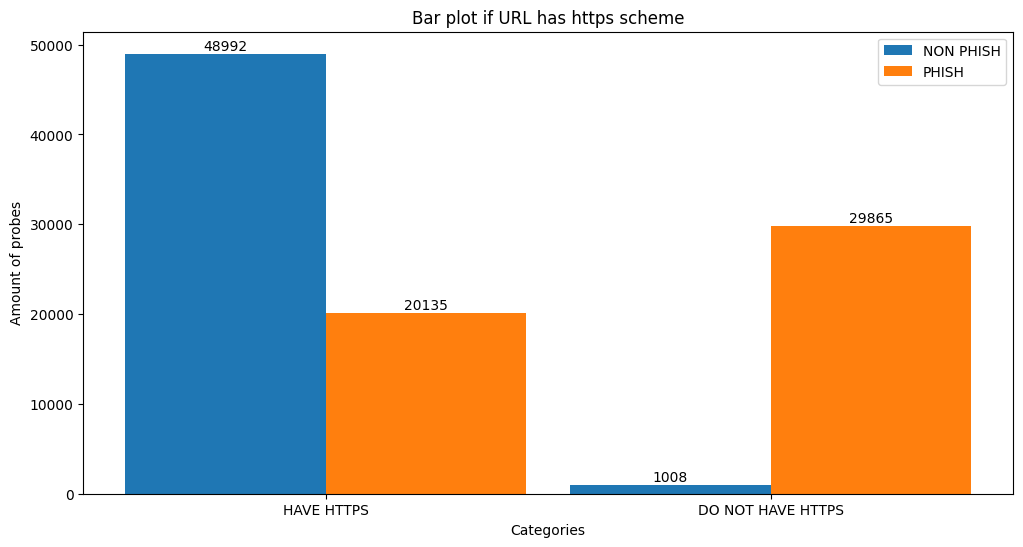

In [61]:
# Filter results
legitimate_and_https_filter = (df_urls['HAVE_HTTPS'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_https_filter = (df_urls['HAVE_HTTPS'] == 0) & (df_urls['label'] == 0)
phish_and_https_filter = (df_urls['HAVE_HTTPS'] == 1) & (df_urls['label'] == 1)
phish_and_not_https_filter = (df_urls['HAVE_HTTPS'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_https_filter]), len(df_urls[legitimate_and_not_https_filter])]
values2 = [len(df_urls[phish_and_https_filter]), len(df_urls[phish_and_not_https_filter])]

PlotTwoCat(
    positive_cat='HAVE HTTPS',
    negative_cat='DO NOT HAVE HTTPS',
    title='Bar plot if URL has https scheme',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


### 5.7 Check if url is abnormal:

In [62]:
df_urls['ABNORMAL_URL'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).abnormal_url else 0)

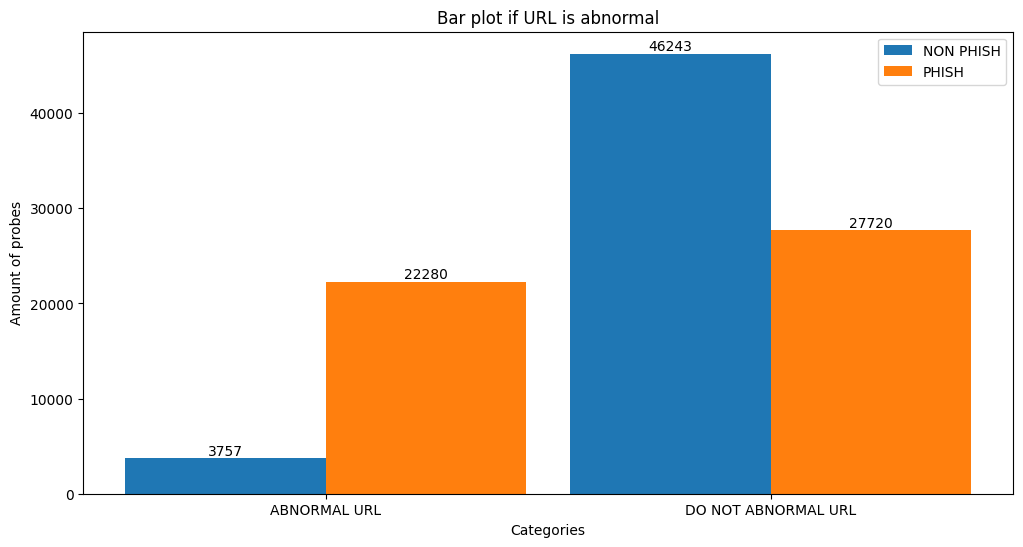

In [63]:
# Filter results
legitimate_and_abnormal_filter = (df_urls['ABNORMAL_URL'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_abnormal_filter = (df_urls['ABNORMAL_URL'] == 0) & (df_urls['label'] == 0)
phish_and_abnormal_filter = (df_urls['ABNORMAL_URL'] == 1) & (df_urls['label'] == 1)
phish_and_not_abnormal_filter = (df_urls['ABNORMAL_URL'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_abnormal_filter]), len(df_urls[legitimate_and_not_abnormal_filter])]
values2 = [len(df_urls[phish_and_abnormal_filter]), len(df_urls[phish_and_not_abnormal_filter])]

PlotTwoCat(
    positive_cat='ABNORMAL URL',
    negative_cat='DO NOT ABNORMAL URL',
    title='Bar plot if URL is abnormal',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()

### 5.8 Count how many digits in the url:

In [64]:
df_urls['DIGITS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_digits())

In [65]:
counted_digits = df_urls[['URL', 'DIGITS_AMOUNT']].groupby('DIGITS_AMOUNT').count()
counted_digits.tail()

,URL
DIGITS_AMOUNT,
359,1
378,1
404,1
501,1
738,1


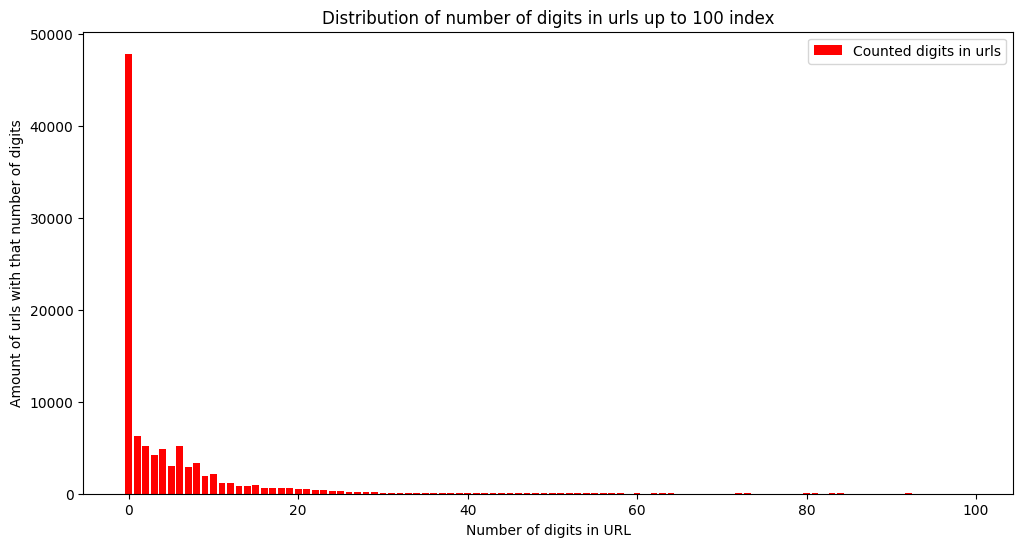

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(counted_digits.index[:100], counted_digits['URL'][:100], color='r')
plt.title('Distribution of number of digits in urls up to 100 index')
plt.xlabel('Number of digits in URL')
plt.ylabel('Amount of urls with that number of digits')
plt.legend(['Counted digits in urls'], loc='best')
plt.show()

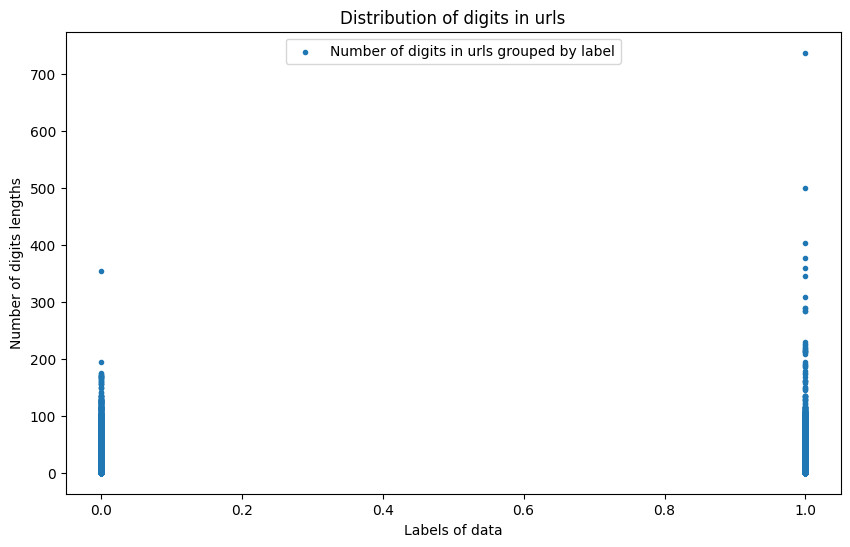

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['DIGITS_AMOUNT'], marker='.')
plt.title("Distribution of digits in urls")
plt.xlabel("Labels of data")
plt.ylabel("Number of digits lengths")
plt.legend(['Number of digits in urls grouped by label'], loc='upper center')
plt.show()

### 5.9 Count how many letters in url:

In [68]:
df_urls['LETTERS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_letters())

In [69]:
counted_letters = df_urls[['URL', 'LETTERS_AMOUNT']].groupby('LETTERS_AMOUNT').count()
counted_letters.tail()

,URL
LETTERS_AMOUNT,
1480,1
1482,1
1568,1
1739,1
2295,1


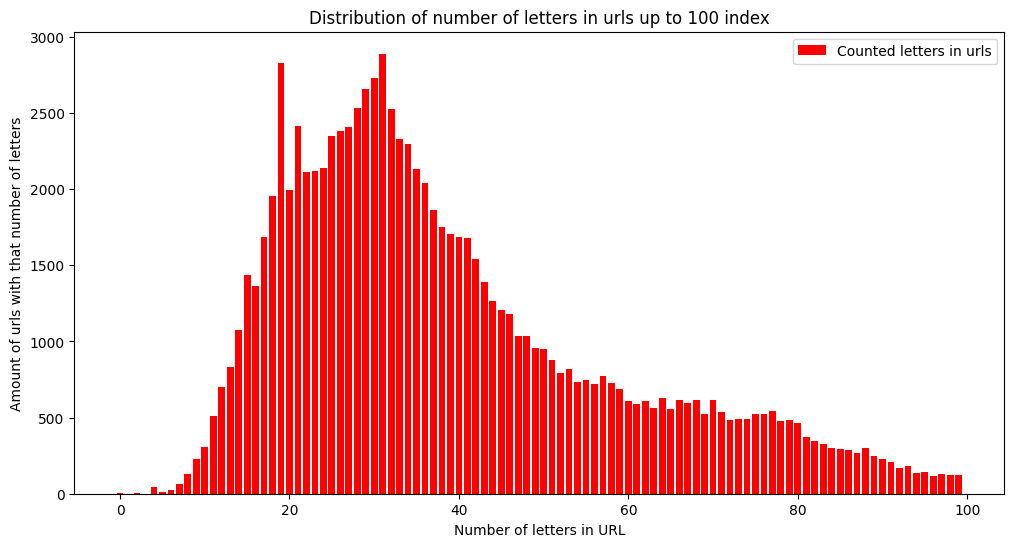

In [70]:
plt.figure(figsize=(12, 6))
plt.bar(counted_letters.index[:100], counted_letters['URL'][:100], color='r')
plt.title('Distribution of number of letters in urls up to 100 index')
plt.xlabel('Number of letters in URL')
plt.ylabel('Amount of urls with that number of letters')
plt.legend(['Counted letters in urls'], loc='best')
plt.show()

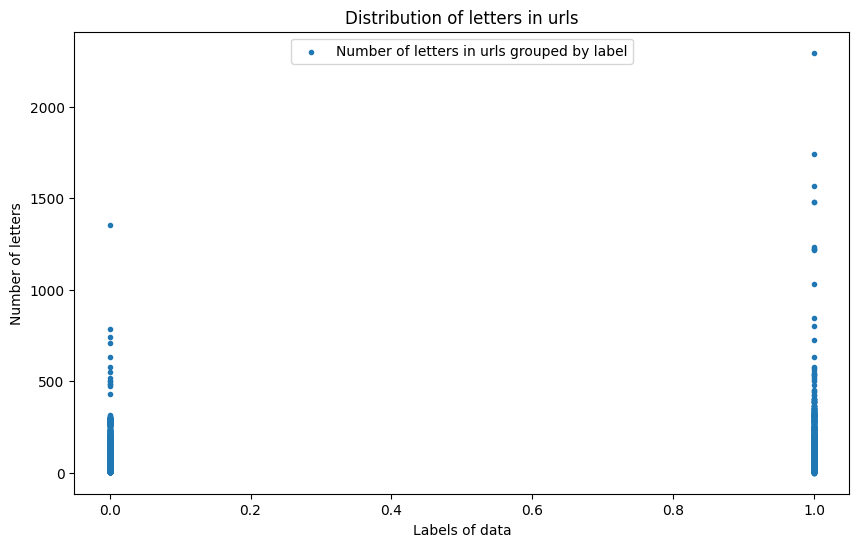

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['LETTERS_AMOUNT'], marker='.')
plt.title("Distribution of letters in urls")
plt.xlabel("Labels of data")
plt.ylabel("Number of letters")
plt.legend(['Number of letters in urls grouped by label'], loc='upper center')
plt.show()

### 5.10 Path Depth:

In [72]:
df_urls['PATH_DEPTH'] =  df_urls['URL'].apply(lambda url: FeatureExtraction(url).path_depth())

In [73]:
path_depth = df_urls[['URL', 'PATH_DEPTH']].groupby('PATH_DEPTH').count()
path_depth

,URL
PATH_DEPTH,
0,9222
1,30582
2,25893
3,16372
4,7174
5,6007
6,2243
7,1234
8,633


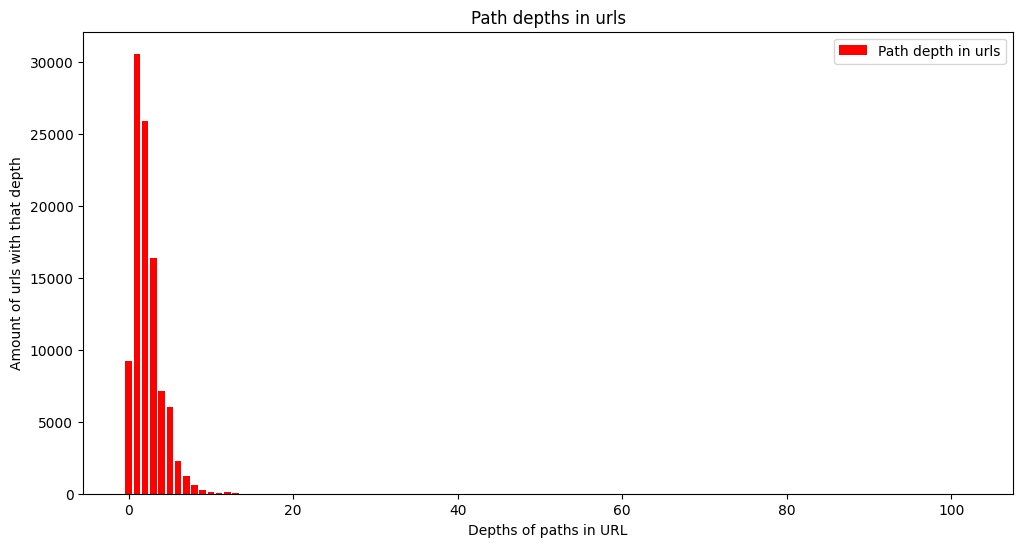

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(path_depth.index, path_depth['URL'], color='r')
plt.title('Path depths in urls')
plt.xlabel('Depths of paths in URL')
plt.ylabel('Amount of urls with that depth')
plt.legend(['Path depth in urls'], loc='best')
plt.show()

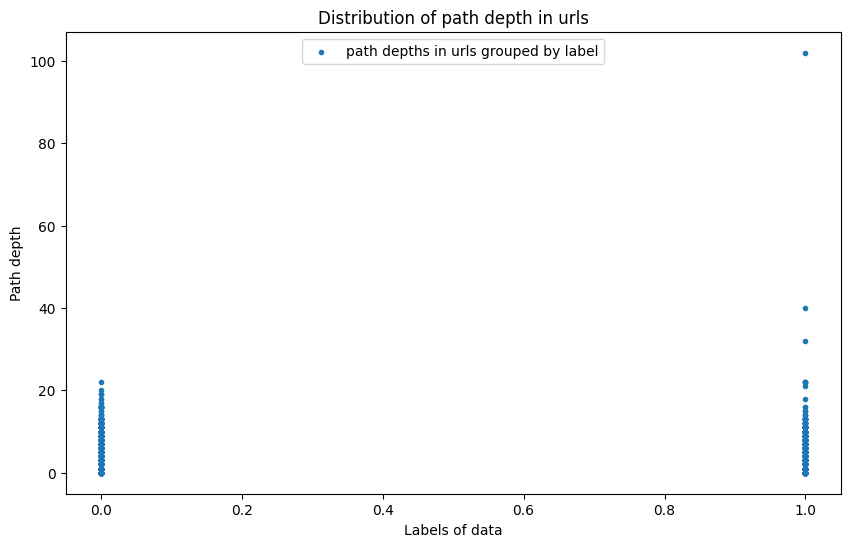

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['PATH_DEPTH'], marker='.')
plt.title("Distribution of path depth in urls")
plt.xlabel("Labels of data")
plt.ylabel("Path depth")
plt.legend(['path depths in urls grouped by label'], loc='upper center')
plt.show()

### 5.11 Dots in netloc:

In [76]:
df_urls['DOTS_IN_NETLOC'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).dots_in_netloc())

In [77]:
dots_in_netloc = df_urls[['URL', 'DOTS_IN_NETLOC']].groupby('DOTS_IN_NETLOC').count()
dots_in_netloc

,URL
DOTS_IN_NETLOC,
0,3784
1,44835
2,40804
3,8210
4,1086
5,398
6,251
7,85
8,48


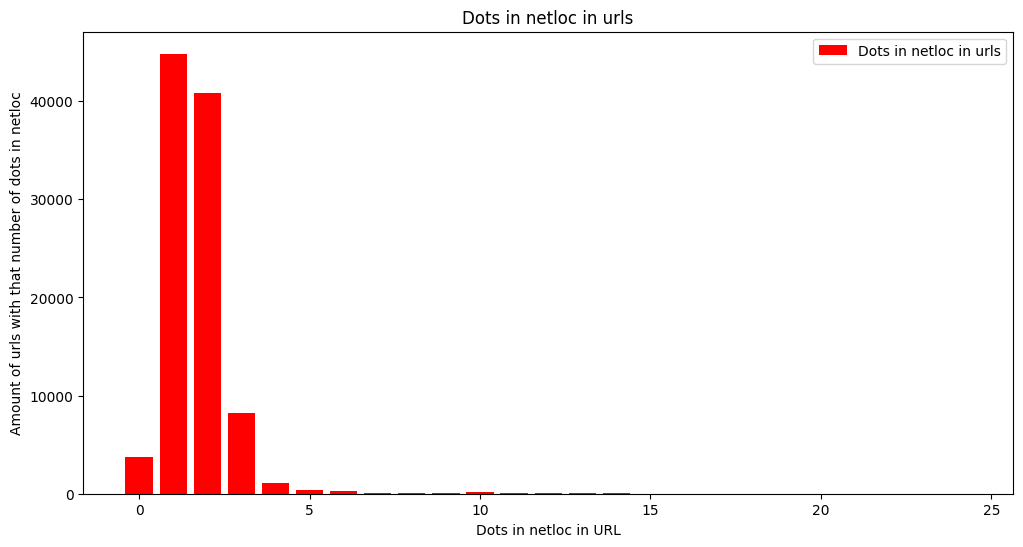

In [78]:
plt.figure(figsize=(12, 6))
plt.bar(dots_in_netloc.index, dots_in_netloc['URL'], color='r')
plt.title('Dots in netloc in urls')
plt.xlabel('Dots in netloc in URL')
plt.ylabel('Amount of urls with that number of dots in netloc')
plt.legend(['Dots in netloc in urls'], loc='best')
plt.show()

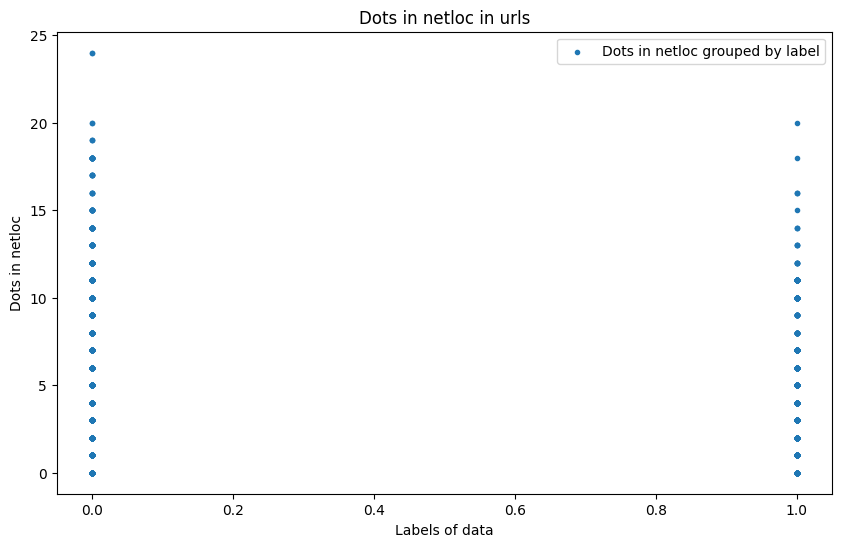

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['DOTS_IN_NETLOC'], marker='.')
plt.title('Dots in netloc in urls')
plt.xlabel("Labels of data")
plt.ylabel('Dots in netloc')
plt.legend(['Dots in netloc grouped by label'], loc='best')
plt.show()

### 5.12 Netloc length:

In [80]:
df_urls['NETLOC_LEN'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).netloc_length())

In [81]:
netloc_len = df_urls[['URL', 'NETLOC_LEN']].groupby('NETLOC_LEN').count()
netloc_len

,URL
NETLOC_LEN,
0,6
1,1
2,1
4,186
5,3993
...,...
228,1
236,1
238,1


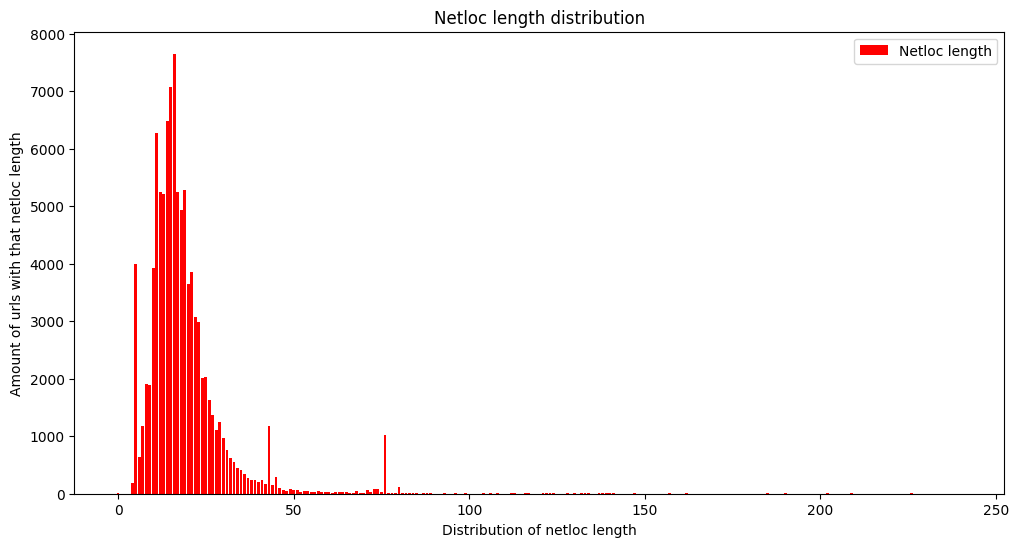

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(netloc_len.index, netloc_len['URL'], color='r')
plt.title('Netloc length distribution')
plt.xlabel('Distribution of netloc length')
plt.ylabel('Amount of urls with that netloc length')
plt.legend(['Netloc length'], loc='best')
plt.show()

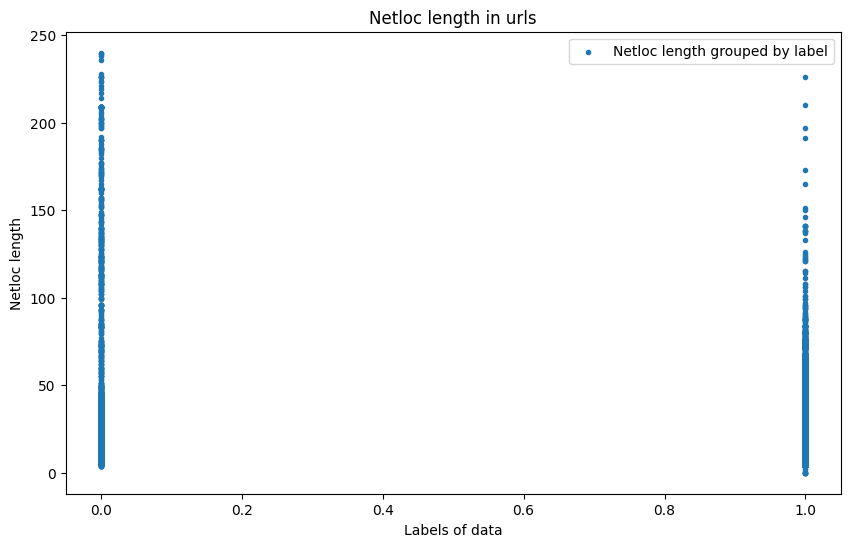

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['NETLOC_LEN'], marker='.')
plt.title('Netloc length in urls')
plt.xlabel("Labels of data")
plt.ylabel('Netloc length')
plt.legend(['Netloc length grouped by label'], loc='best')
plt.show()

### 5.13 Check if URL has shortening services pattern:

In [84]:
df_urls['HAVE_SHORTENING_PATTERNS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_shortening_patterns() else 0)

In [85]:
df_urls[['URL', 'HAVE_SHORTENING_PATTERNS']].tail(20)

,URL,HAVE_SHORTENING_PATTERNS
99980,https://atpworldtour.com/Tennis/Players/La/M/M...,0
99981,https://hfboards.com/forumdisplay.php?f=181,0
99982,https://mylife.com/104398483,0
99983,https://videosurf.com/newport-rhode-island-243274,0
99984,http://oldschool-membership.com/m=weblogin/log...,0
99985,https://docs.google.com/presentation/d/e/2PACX...,0
99986,https://tartan-finder.com/Robertson_Clan_Shop.htm,0
99987,auth.unlock.account.access.wf-south.review,0
99988,www2.latech.edu/~acm/helloworld/haskell.html,0
99989,https://yenndesigns.com/paypal.de/kunden/secur...,0


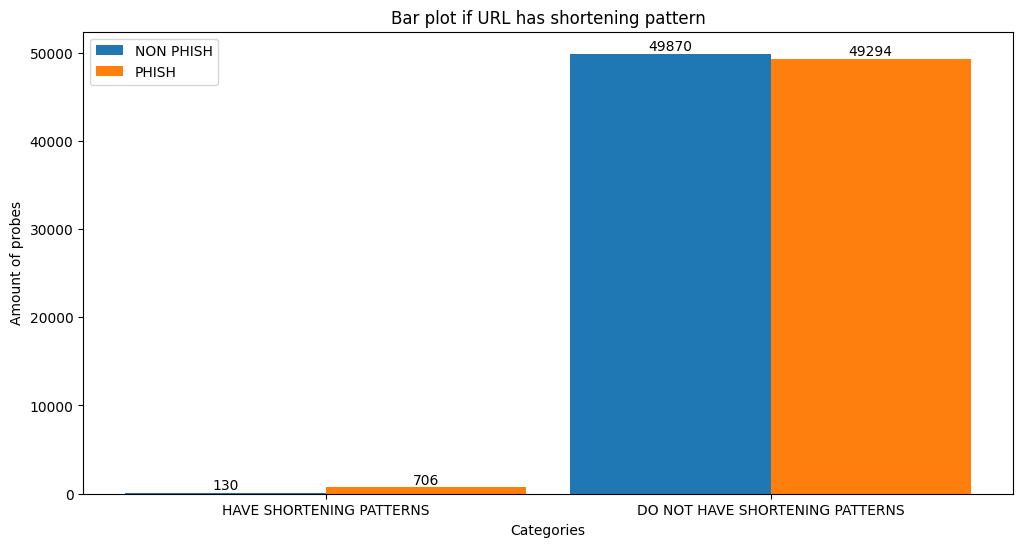

In [86]:
# Filter results
legitimate_and_shortening_pattern_filter = (df_urls['HAVE_SHORTENING_PATTERNS'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_shortening_pattern_filter = (df_urls['HAVE_SHORTENING_PATTERNS'] == 0) & (df_urls['label'] == 0)
phish_and_shortening_pattern_filter = (df_urls['HAVE_SHORTENING_PATTERNS'] == 1) & (df_urls['label'] == 1)
phish_and_not_shortening_pattern_filter = (df_urls['HAVE_SHORTENING_PATTERNS'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_shortening_pattern_filter]), len(df_urls[legitimate_and_not_shortening_pattern_filter])]
values2 = [len(df_urls[phish_and_shortening_pattern_filter]), len(df_urls[phish_and_not_shortening_pattern_filter])]

PlotTwoCat(
    positive_cat='HAVE SHORTENING PATTERNS',
    negative_cat='DO NOT HAVE SHORTENING PATTERNS',
    title='Bar plot if URL has shortening pattern',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()

In [87]:
df_urls['HAVE_JS_CODE'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_javascript_code() else 0)

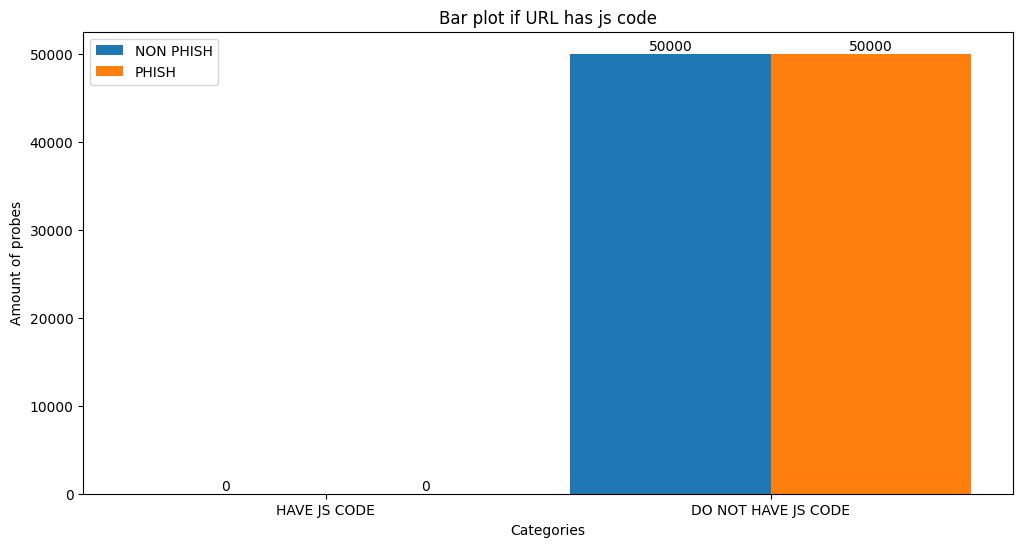

In [88]:
# Filter results
legitimate_and_have_js_filter = (df_urls['HAVE_JS_CODE'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_js_filter = (df_urls['HAVE_JS_CODE'] == 0) & (df_urls['label'] == 0)
phish_and_have_js_filter = (df_urls['HAVE_JS_CODE'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_js_filter = (df_urls['HAVE_JS_CODE'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_js_filter]), len(df_urls[legitimate_and_not_have_js_filter])]
values2 = [len(df_urls[phish_and_have_js_filter]), len(df_urls[phish_and_not_have_js_filter])]

PlotTwoCat(
    positive_cat='HAVE JS CODE',
    negative_cat='DO NOT HAVE JS CODE',
    title='Bar plot if URL has js code',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()

In [89]:
df_urls.head()

,OLD_INDEX,URL,label,URL_LENGTH,HAVE_@,HAVE_IP,LONGER_THAN_MEAN,!,@,#,...,"""",HAVE_HTTPS,ABNORMAL_URL,DIGITS_AMOUNT,LETTERS_AMOUNT,PATH_DEPTH,DOTS_IN_NETLOC,NETLOC_LEN,HAVE_SHORTENING_PATTERNS,HAVE_JS_CODE
0,112028,www.gc.edu/gc/Culinary_Arts.asp?SnID=517480990,1,46,0,0,0,0,0,0,...,0,0,1,9,29,2,2,10,0,0
1,14473,http://payday2concepts.jimdo.com/,0,33,0,0,0,0,0,0,...,0,0,0,1,26,1,2,25,0,0
2,7439,https://uspc.uspbo.top/pg/?do=index,1,35,0,0,0,0,0,0,...,0,1,0,0,26,2,2,14,0,0
3,107002,https://pointsdevue.net/home,0,28,0,0,0,0,0,0,...,0,1,0,0,23,1,1,15,0,0
4,129609,homepage.eircom.net/~deelakord/,1,31,0,0,0,0,0,0,...,0,0,1,0,26,2,2,19,0,0


## 6. Learn models

### 6.1 Drop unnecessary or zero columns:

In [90]:
X = df_urls.drop(['OLD_INDEX', 'URL', 'label'], axis=1)
y = df_urls['label']

In [91]:
for col_idx in range(len(X.columns)):
    if X[X.columns[col_idx]].sum() == 0:
        X = X.drop(X.columns[col_idx], axis=1)

In [92]:
X.columns

Index(['URL_LENGTH', 'HAVE_@', 'HAVE_IP', 'LONGER_THAN_MEAN', '!', '@', '#',
       '$', '%', '^', '&', '*', '(', ')', '{', '}', '[', ']', '~', '`', ':',
       ';', '|', '\', ',', '.', '<', '>', '?', '/', '+', '=', '-', '_', ''',
       '"', 'HAVE_HTTPS', 'ABNORMAL_URL', 'DIGITS_AMOUNT', 'LETTERS_AMOUNT',
       'PATH_DEPTH', 'DOTS_IN_NETLOC', 'NETLOC_LEN',
       'HAVE_SHORTENING_PATTERNS'],
      dtype='object')

In [93]:
X.head()

,URL_LENGTH,HAVE_@,HAVE_IP,LONGER_THAN_MEAN,!,@,#,$,%,^,...,',"""",HAVE_HTTPS,ABNORMAL_URL,DIGITS_AMOUNT,LETTERS_AMOUNT,PATH_DEPTH,DOTS_IN_NETLOC,NETLOC_LEN,HAVE_SHORTENING_PATTERNS
0,46,0,0,0,0,0,0,0,0,0,...,0,0,0,1,9,29,2,2,10,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,26,1,2,25,0
2,35,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,26,2,2,14,0
3,28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,23,1,1,15,0
4,31,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,26,2,2,19,0


In [94]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

### 6.2 Split probes into train, validate and test sets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test,  = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape} - Percentage: {X_train.shape[0] / X.shape[0] * 100}%")
print(f"X_val shape: {X_val.shape} - Percentage: {X_val.shape[0] / X.shape[0] * 100}%")
print(f"X_test shape: {X_test.shape} - Percentage: {X_test.shape[0] / X.shape[0] * 100}%")
print(f"y_train shape: {y_train.shape} - Percentage: {y_train.shape[0] / y.shape[0] * 100}%")
print(f"y_val shape: {y_val.shape} - Percentage: {y_val.shape[0] / y.shape[0] * 100}%")
print(f"y_test shape: {y_test.shape} - Percentage: {y_test.shape[0] / y.shape[0] * 100}%")

X_train shape: (60000, 44) - Percentage: 60.0%
X_val shape: (20000, 44) - Percentage: 20.0%
X_test shape: (20000, 44) - Percentage: 20.0%
y_train shape: (60000,) - Percentage: 60.0%
y_val shape: (20000,) - Percentage: 20.0%
y_test shape: (20000,) - Percentage: 20.0%


### 6.3 Configure parameters:

In [96]:
best_accuracy_random_state = 0
best_accuracy = 0
MIN_RANGE = 0
MAX_RANGE = 300
HOP = 5
best_model = None

### 6.4 Random Forest Classifier:

In [97]:
# RandomForestClassifier

for state in range(MIN_RANGE + 1, MAX_RANGE, HOP):
    clf = RandomForestClassifier(random_state=state, n_estimators=131)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if best_accuracy < accuracy:
        best_accuracy_random_state = state
        best_accuracy = accuracy
        best_model = clf
    print(f"Accuracy of random state {state}: {accuracy}")
    
print(f"Best accuracy: {best_accuracy} - random state: {best_accuracy_random_state}")
# best accuracy 0.93215

Accuracy of random state 1: 0.9269
Accuracy of random state 6: 0.92685
Accuracy of random state 11: 0.92725
Accuracy of random state 16: 0.92665
Accuracy of random state 21: 0.92685
Accuracy of random state 26: 0.9272
Accuracy of random state 31: 0.9274
Accuracy of random state 36: 0.9263
Accuracy of random state 41: 0.92745
Accuracy of random state 46: 0.92625
Accuracy of random state 51: 0.92775
Accuracy of random state 56: 0.9272
Accuracy of random state 61: 0.9275
Accuracy of random state 66: 0.92725
Accuracy of random state 71: 0.9274
Accuracy of random state 76: 0.92665
Accuracy of random state 81: 0.9266
Accuracy of random state 86: 0.92745
Accuracy of random state 91: 0.92725
Accuracy of random state 96: 0.9275
Accuracy of random state 101: 0.92795
Accuracy of random state 106: 0.92715
Accuracy of random state 111: 0.92695
Accuracy of random state 116: 0.92675
Accuracy of random state 121: 0.92675
Accuracy of random state 126: 0.927
Accuracy of random state 131: 0.9272
Accuracy

### 6.5 Extra Trees Classifier:

In [98]:
# ExtraTreesClassifier
best_accuracy_random_state = 0
best_accuracy = 0
best_model = None
for state in range(1, 20, 5):
    extra_trees_classifier = ExtraTreesClassifier(random_state=state, n_estimators=40)
    extra_trees_classifier.fit(X_train, y_train)
    y_pred_extra_trees = extra_trees_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_extra_trees)
    if best_accuracy < accuracy:
        best_accuracy_random_state = state
        best_accuracy = accuracy
        best_model = extra_trees_classifier
    print(f"Accuracy of random state {state}: {accuracy}")
    
print(f"Best accuracy: {best_accuracy} - random state: {best_accuracy_random_state}")

Accuracy of random state 1: 0.92465
Accuracy of random state 6: 0.9254
Accuracy of random state 11: 0.9259
Accuracy of random state 16: 0.925
Best accuracy: 0.9259 - random state: 11


In [99]:
y_pred_extra_trees= best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_extra_trees)
precision = precision_score(y_test, y_pred_extra_trees)
print("Precision: ", precision)
print("Accuracy: ", accuracy)

Precision:  0.9429010763710918
Accuracy:  0.9269


### 6.6 Save best model:

In [100]:
with open(os.path.join('saved_models', 'random_forest_model_params_best'), mode='wb') as file_handler:
    pickle.dump(best_model, file_handler)

In [101]:
# with open(os.path.join('saved_models', 'random_forest_model_params_best'), mode='rb') as file_handler:
#     model = pickle.load(file_handler)

In [102]:
# pd.DataFrame(X_test.loc[76434]).transpose()

In [103]:
# y_test.loc[76434]

### 6.7 Multilayer Perceptron:

In [104]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', name='l1'))
model.add(Dense(256, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(64, activation='relu', name='hidden_layer3'))
model.add(Dense(64, activation='relu', name='hidden_layer4'))
model.add(Dense(32, activation='relu', name='hidden_layer5'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7511 - loss: 0.5263 - precision: 0.7622
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8770 - loss: 0.2950 - precision: 0.8839
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8936 - loss: 0.2606 - precision: 0.9033
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8977 - loss: 0.2447 - precision: 0.9054
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9013 - loss: 0.2326 - precision: 0.9058


In [105]:
loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')
print(f'Test loss: {loss * 100:.2f}%')
print(f'Test precision: {precision * 100:.2f}%')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8992 - loss: 0.2458 - precision: 0.9286
Test accuracy: 90.08%
Test loss: 24.42%
Test precision: 93.04%
